# <center><font color=slate>SVM - Support Vector Machines</font></center>


In [2]:
import scipy.io
import matplotlib.pyplot as plt
from SVM_kernel import *
import numpy as np

params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "y",
          "axes.facecolor" : "None",
          "text.color" : 'w'}
plt.rcParams.update(params)

## <center><font color=tomato>1.1 Linear kernel SVM</font></center>

In [2]:
mat = scipy.io.loadmat('data/ex6data1.mat')
X = mat["X"]
y = mat["y"]

[LibSVM]

/Users/jalejo/.conda/envs/MLStanfod/lib/python3.8/site-packages/sklearn/svm/_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


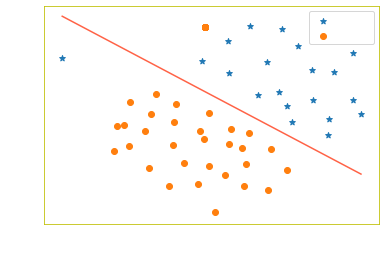

In [3]:
C = 1
model = svm_train(X, y, C, "linear", 1e-3, 20)
visualize_boundary_linear(X, y, model)
plot_scatter(X, y)

[LibSVM]

/Users/jalejo/.conda/envs/MLStanfod/lib/python3.8/site-packages/sklearn/svm/_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


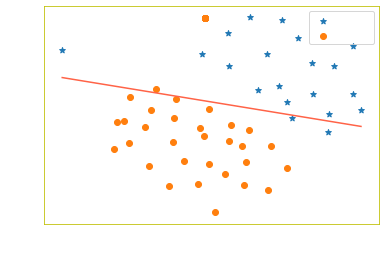

In [4]:
C = 100
model = svm_train(X, y, C, "linear", 1e-3, 20)
visualize_boundary_linear(X, y, model)
plot_scatter(X, y)

## <center><font color=tomato>1.2 SVM with gaussian kernels</font></center>
We extend our SVM capabilities by defining a Gaussian RBF kernel. In case you're curious, here's a more detailed explanation of the [difference between a Gaussian kernel and a Gaussian _RBF_ kernel](https://stats.stackexchange.com/questions/79192/gaussian-rbf-vs-gaussian-kernel). Roughly, the Gaussian RBF kernel used here helps us measure the distance or the similarity between a pair of examples.

We use a ``sigma`` parameter that indicates how quickly the similarity metric decreases as two examples are further apart.

Using a custom kernel with [``sklearn.svm.SCV()``](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) was not as well documented as I'd hoped, so I put up an [answer about it](https://stackoverflow.com/a/38647546/583834) in Stack Overflow.

We evaluate the implementation of ``gaussianKernel()``. The output should be about 0.324652.

In [5]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
sim = gaussian_kernel(x1, x2, sigma)
print(f"Gaussian Kernel between x1 = {x1}, x2 = {x2}, sigma = {sigma}, \n{sim:.4f}")

Gaussian Kernel between x1 = [1 2 1], x2 = [ 0  4 -1], sigma = 2, 
0.3247


### <font color=lightGreen>1.2.2.  A more complex dataset</font>

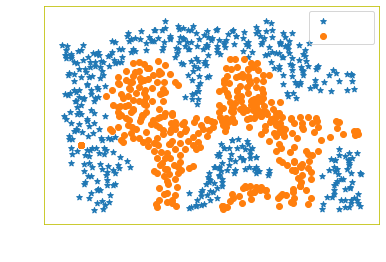

In [6]:
mat = scipy.io.loadmat('data/ex6data2.mat')
X = mat["X"]
y = mat["y"]
plot_scatter(X, y)

And now we can train a SVM with a Gaussian RBF kernel and visualize the boundaries it learns:

[LibSVM]

/Users/jalejo/Google Drive/projects/Python/Courses Pluralsight/Practice Pycharm/MLStanfod/SVM_kernel.py:95: UserWarning: No contour levels were found within the data range.
  plt.contour(X1, X2, vals, colors="white", levels=[0, 0], linewidth=5)
/Users/jalejo/Google Drive/projects/Python/Courses Pluralsight/Practice Pycharm/MLStanfod/SVM_kernel.py:95: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(X1, X2, vals, colors="white", levels=[0, 0], linewidth=5)


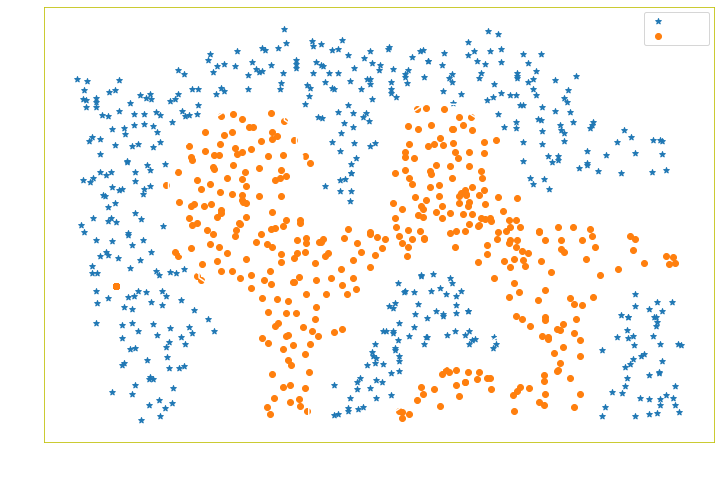

In [7]:
C = 1
sigma = 0.1
model = svm_train(X, y, C, "gaussian_rbf", sigma=sigma)
visualize_boundary(X, y, model)
plot_scatter(X, y);

### <font color=lightGreen>1.3 Optimizing SVM parameters</font>


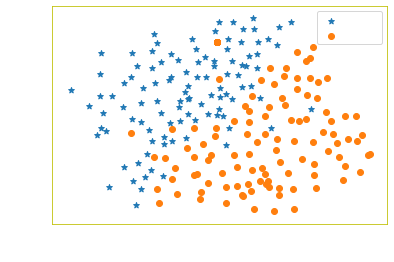

In [6]:
mat = scipy.io.loadmat('data/ex6data3.mat')
X = mat["X"]
y = mat["y"]
plot_scatter(X, y)

We can try different parameters on a validation set to find a good fit for the trained boundaries. We define a function to explore the range {0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30} for ``C`` and ``sigma``.

And we run it to find the optimal values of `C` and `sigma`.

In [7]:
Xval = mat["Xval"]
yval = mat["yval"]

C, sigma = dataset_3_params(X, y, Xval, yval)
print("Best parameters are C={:.2f}, sigma={:.2f}".format(C, sigma))

 trying C=0.01, sigma=0.01...
[LibSVM] trying C=0.03, sigma=0.01...
[LibSVM] trying C=0.10, sigma=0.01...
[LibSVM] trying C=0.30, sigma=0.01...
[LibSVM] trying C=1.00, sigma=0.01...
[LibSVM] trying C=3.00, sigma=0.01...
[LibSVM] trying C=10.00, sigma=0.01...
[LibSVM] trying C=30.00, sigma=0.01...
[LibSVM] trying C=0.01, sigma=0.03...
[LibSVM] trying C=0.03, sigma=0.03...
[LibSVM] trying C=0.10, sigma=0.03...
[LibSVM] trying C=0.30, sigma=0.03...
[LibSVM] trying C=1.00, sigma=0.03...
[LibSVM] trying C=3.00, sigma=0.03...
[LibSVM] trying C=10.00, sigma=0.03...
[LibSVM] trying C=30.00, sigma=0.03...
[LibSVM] trying C=0.01, sigma=0.10...
[LibSVM] trying C=0.03, sigma=0.10...
[LibSVM] trying C=0.10, sigma=0.10...
[LibSVM] trying C=0.30, sigma=0.10...
[LibSVM] trying C=1.00, sigma=0.10...
[LibSVM] trying C=3.00, sigma=0.10...
[LibSVM] trying C=10.00, sigma=0.10...
[LibSVM] trying C=30.00, sigma=0.10...
[LibSVM] trying C=0.01, sigma=0.30...
[LibSVM] trying C=0.03, sigma=0.30...
[LibSVM] tryin

Finally, we use these parameters to train a SVM model and visualize its boundaries.

[LibSVM]

/Users/jalejo/Google Drive/projects/Python/Courses Pluralsight/Practice Pycharm/MLStanfod/SVM_kernel.py:95: UserWarning: No contour levels were found within the data range.
  plt.contour(X1, X2, vals, colors="white", levels=[0, 0], linewidth=5)
/Users/jalejo/Google Drive/projects/Python/Courses Pluralsight/Practice Pycharm/MLStanfod/SVM_kernel.py:95: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(X1, X2, vals, colors="white", levels=[0, 0], linewidth=5)


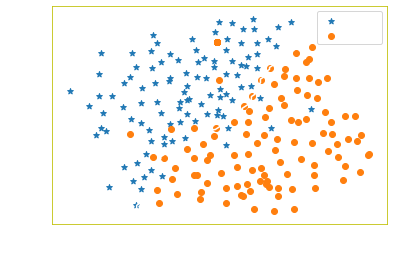

In [8]:
model = svm_train(X, y, C, "gaussian_rbf", sigma=sigma)
visualize_boundary(X, y, model)
plot_scatter(X, y);